## 决策树算法：从原理到实践


- 罗晨，2015级传播研究方法硕士


- 内容

    - 决策树算法简介
    - 两种主要的属性选择算法（ID3、C4.5），ID3 中信息增益率的概念与计算方式
    - 如何应对过度拟合
    - 分别用 Python 的机器学习框架 scikit-learn (env: Python 3.6), KNIME 数据挖掘软件来进行决策树算法的操作
    
    
- 2018-03-19，18:00-21:50，48#A805

<img src='playGolfData.png' align='center'>


<img src='playGolfDecisionTree.png' align='center'>

### 1. 决策树是什么？

- 决策树：一种非常简单的分类算法，构造一个决策树不需要太多的专业知识，非常适合探索性工作


- 类似于“选对象”，以下的模拟对话体现出决策逻辑，我们可以用树（节点、分杈、叶子）的形式来予以表现
    
    - `Daughter`: 多大年纪？
    - `Mom`: 26
    - `Daughter`: 帅不帅？
    - `Mom`: 挺帅的
    - `Daughter`: 收入高吗？
    - `Mom`: 不算很高，中等。
    - `Daughter`: 是公务员吗？
    - `Mom`: 是
    - `Daughter`: 那我去见见
    
    
- **菱形**：判断条件；**矩阵**：决策结果；**箭头**：一个判断条件在不同情况下的决策路径


- 决策树（Decision Tree）定义：一个树结构，每个非叶子节点表示一个特征属性上的测试，每个分支代表这个特征属性在某个值域上的输出，每个叶子节点存放一个类别。使用决策树进行决策的过程从根节点开始，测试待分类项中的特征属性，并按照值选择输出到分支，直到到达叶子节点，将叶子节点存放的类别作为决策结果。

### 2. 决策树构造

- 核心：进行属性选择度量（选择分裂准则）确定每个特征属性之间的拓扑结构

    - 分裂属性：在某个节点处按照某一特征属性的不同划分构造不同的分支，目标是让每个分裂子集尽可能地纯（pure, 尽量使得一个分裂子集中待分类项属于同一类别）

        - 属性是离散值，不生成二叉树，那么用属性的每一个划分作为一个分支
        - 属性是离散值，生成二叉树，使用属性划分的一个子集进行测试，按照“属于此子集”和“不属于此子集”分成两个分支
        - 属性是连续值，需要确定一个值作为作为分裂点，按照 `>= split point` 和 `< split point`生成分支

### 3. 常见的属性选择度量算法

#### 第一种度量算法：ID3

---

- ID3：以信息熵下降的速度为选取标准，即在每个节点选取还尚未被用来划分的具有最高信息增益的属性作为划分标准，然后继续这个过程，直到生成的决策树能完美分类训练样例
    - 核心概念：信息、信息熵、信息增益（由 Claude Elwood Shannon 提出）

    - 信息的公式
$$I=-log_{2}p(x_{i})$$

    - 假定训练样例为D，分类前的信息熵公式如下，$p_{i}$表示第i类别在整个训练样例中出现的概率，m表示训练样例的所有类别数量
$$info(D)=-\sum^{m}_{i=1}p_{i}log_{2}(p_{i})$$

    - 将训练元组D按照属性A进行划分，共分为v类，则A对D的期望信息（信息熵就是信息的期望值）为：
$$info_{A}(D)=\sum^{v}_{j=1}\frac{|D_{j}|}{|D|}info(D_{j})$$

    - 信息增益
$$gain(A)=info(D)-info_{A}(D)$$

- 练习：计算以下三个属性的信息增益 (s=small, m=middle, l=large)，本例中，公式中的D为账号真实性（Validity），日志密度：diary，好友密度：friend，真实头像：avatar

|日志密度|好友密度|是否使用真实头像|账号是否真实|
|:----:|:----:|:----:|:----:|
|s|s|no|no|
|s|l|yes|yes|
|l|m|yes|yes|
|m|m|yes|yes|
|l|m|yes|yes|
|m|l|no|yes|
|m|s|no|no|
|l|m|no|yes|
|m|s|no|yes|
|s|s|yes|no|

- 解（涉及到对数等复杂运算推荐iPhone APP: **MyScript Calculator** (developed by MyScript$^{\circledR}$)）：

$info(D)=-0.3*log_{2}(0.3)-0.7*log_{2}(0.7)$

=$-0.3*(-1.736)-0.7*(-0.514)$

=$0.5208+0.3958$

=$0.8806$

---

$info_{d}(D)=0.3*(-\frac{1}{3}*log_{2}\frac{1}{3}-\frac{2}{3}*log_{2}\frac{2}{3})+0.4*(-\frac{3}{4}*log_{2}\frac{3}{4}-\frac{1}{4}*log_{2}\frac{1}{4})+0.3*(-\frac{3}{3}*log_{2}\frac{3}{3}-\frac{0}{3}*log_{2}\frac{0}{3})$

= $0.3*(0.528+0.389)+0.4*(0.311+0.5)+0.3*(0)$

= $0.2751+0.3244+0$

= $0.5995$

---

$gain(d)=0.8806-0.5595=0.3211$

- 如果用手动计算信息增益会很麻烦，因此依赖Python代码解决

In [1]:
from math import log
import pandas as pd

In [2]:
# 导入数据并预览
data = pd.read_excel('decisionTree01.xlsx', header=0)
data.head()

,diary,friend,avatar,Validity
0,s,s,no,no
1,s,l,yes,yes
2,l,m,yes,yes
3,m,m,yes,yes
4,l,m,yes,yes


In [3]:
# 进行分组
# 输入分裂属性
attribute = input('Enter the attribute: ')
# 输入目标列的名称
target = input('Enter the target: ')
# 给出分类汇总表
group = data.groupby([attribute, target]).count()
data.groupby([attribute, target]).count()

Enter the attribute: friend
Enter the target: Validity


diary  avatar
friend Validity               
l      yes           2       2
m      yes           4       4
s      no            3       3
       yes           1       1

In [4]:
# 为分裂属性建立字典（dict）
attr_dict = dict()
# 获取目标列所有的、不重复的分类
target_attr = set(data[target])
for i in set(data[attribute]):
    attr_dict[i] = {}
    for j in target_attr:
        try:
            # 直接计算比例/概率
            print(data.groupby([attribute]).count()[target][i])
            attr_dict[i][j] = group.loc[i, j][0] / data.groupby([attribute]).count()[target][i]
        except:
            attr_dict[i][j] = 0
print(attr_dict)

2
2
4
4
4
4
{'l': {'yes': 1.0, 'no': 0}, 'm': {'yes': 1.0, 'no': 0}, 's': {'yes': 0.25, 'no': 0.75}}


In [5]:
# 计算分类前的信息熵
before = {}
length = len(set(data[target]))
before_group = data.groupby([target]).count()[attribute]
for i in range(length):
    before[list(set(data[target]))[i]] = before_group[list(set(data[target]))[i]]
before_entropy = 0
for key in before.keys():
    # 根据公式进行累加
    _ = float(before[key]) / len(data)
    before_entropy += -_ * log(_, 2)
print(before_entropy)

0.8812908992306927


In [6]:
# 计算分类后的信息熵
after_entropy = 0
for i in set(data[attribute]):
    for j in set(data[target]):
        _ = attr_dict[i][j]
        try:
            after_entropy += data.groupby([attribute]).count()[target][i] / len(data) * (-_ * log(_, 2))
            # 还需要考虑到0无法取对数的情况
        except:
            after_entropy += 0.
print(after_entropy)

0.32451124978365314


In [7]:
# 信息增益
print('Gain: ', before_entropy - after_entropy)

Gain:  0.5567796494470396


- 将以上的信息增益计算代码片段进行合并，形成ID3算法下信息增益的计算代码段

In [8]:
import pandas as pd
from math import log

dataFile = input('输入数据文件路径: ')
attribute = input('输入属性列名称: ')
target = input('输入目标列名称: ')

class infoGain:
    def __init__(self, attribute, target, dataFile):
        self.attribute, self.target, self.dataFile = attribute, target, dataFile
        self.data = pd.read_excel(self.dataFile, header = 0)
        self.group_1 = self.data.groupby([self.attribute, self.target]).count()
        self.group_2 = self.data.groupby([self.attribute]).count()
        self.group_3 = self.data.groupby([self.target]).count()
        self.attribute_cate = set(self.data[self.attribute])
        self.target_cate = set(self.data[self.target])

    def division(self):
        attr_dict = dict()
        for i in self.attribute_cate:
            attr_dict[i] = dict()
            for j in self.target_cate:
                try:
                    attr_dict[i][j] = self.group_1.loc[i, j][0] / self.group_2[self.target][i]
                except:
                    attr_dict[i][j] = 0
        return attr_dict

    def beforeEntropy(self):
        before = {}
        length = len(self.target_cate)
        before_group = self.group_3[self.attribute]
        for i in range(length):
            before[list(self.target_cate)[i]] = before_group[list(self.target_cate)[i]]
        before_entropy = 0
        for key in before.keys():
            _ = float(before[key]) / len(self.data)
            before_entropy += -_ * log(_, 2)
        return before_entropy

    def afterEntropy(self, attr_dict):
        after_entropy = 0
        for i in self.attribute_cate:
            for j in self.target_cate:
                _ = attr_dict[i][j]
                try:
                    after_entropy += (self.group_2[self.target][i] / len(self.data)) * (-_ * log(_, 2))
                except:
                    after_entropy += 0.
        return after_entropy

    def gain(self, before_entropy, after_entropy):
        print('\n', attribute, '属性对应的信息增益为:', before_entropy - after_entropy)

if __name__ == "__main__":
    infogain = infoGain(attribute, target, dataFile)
    division = infogain.division()
    beforeEntropy = infogain.beforeEntropy()
    afterEntropy = infogain.afterEntropy(division)
    infogain.gain(beforeEntropy, afterEntropy)

输入数据文件路径: decisionTree01.xlsx
输入属性列名称: friend
输入目标列名称: Validity

 friend 属性对应的信息增益为: 0.5567796494470396


- 在确定第一个分裂属性后，再递归使用以上方法计算子节点的分裂属性，最终可以得到整个决策树


- 注意：决策树的特征属性一般为离散型，如果特征属性为连续型，则处理方式如下

    - 将训练样例D中的元素按照特征属性排序，每两个相邻元素的中间点可以视为**潜在分裂点**
    - 从第一个潜在分裂点开始，分裂训练样例D并计算两个集合的期望信息，具有**最小期望信息的点称为这个属性的最佳分裂点**，其信息期望作为该属性的信息期望
    - 这一过程一般依赖软件(如：KNIME)自动实现

#### 第二种度量方法：C4.5

---

- ID3算法偏向多值属性，请思考如果存在唯一标识属性ID，那么ID3就会将ID作为分裂属性，虽然划分纯净，但是毫无意义


- C4.5在ID3基础上进行改进，使用**增益率 (gain ratio)**来修正了信息增益


- 分裂信息公式：

$$split\_info_{A}(D)=-\sum^{v}_{j=1}\frac{|D_{j}|}{D}*log_{2}(\frac{|D_{j}|}{D})$$


- 增益率公式：

$$gain\_ratio(A)=\frac{gain(A)}{split\_info(A)}$$


- 具有最大增益率的属性就作为分裂属性

### 4. 属性用完了叶子节点还不纯净？

- 由于没有更多信息可用了，一般进行多数表决，以子集中出现频数最多的类别作为该节点的类别

### 5. 剪枝 (prune)

- 剪枝的作用：为了应对由于噪声、离群值带来的过度拟合问题


- 两种类型

    - 先剪枝：在决策树构造过程中，当某个节点满足剪枝条件，则直接停止此分支的继续生长
    - 后剪枝：先构造完整的决策树，然后通过某些条件来遍历决策树来进行剪枝

### 6. 决策树的实现：基于KNIME

- 重点

    - 用训练数据 (training dataset) 来建立决策树模型，再利用模型来对测试数据 (testing dataset) 做出预测，比较正确分类与预测分类的差异，对模型质量做出评判
    - 使用 KNIME 的 JS 交互功能组件来构建交互式的决策树视图


- 混淆矩阵 (confusion matrix)

    - 又称为可能性表格或错误矩阵，是一种用特定的矩阵来呈现算法性能的可视化方式。混淆的含义：一个 class 被预测为另一个 class
    - 类似于 SPSS 生成的交叉表 (crosstab)
    - 所有预测正确的结果都在对角线上，预测错误值呈现在对角线外
    - 混淆表格专业术语：假阳性 (False positives), 假阴性 (False negatives), 真阳性 (True positives), 真阴性 (True negatives)
    - 以 2 \* 2 表格为例


<img src='confusionMatrix.png' align='center'>

### 7. 决策树的实现：基于机器学习框架scikit-learn

- 什么是机器学习？
    - 用计算机来模拟和学习人的行为，以获取新的知识或技能，重新组织已有的知识结构使之不断完善自身的性能
    
    - 监督学习：在机器学习过程中提供对错提示，通过算法让机器自己减少误差，主要用于**分类(regression)**和**预测(classification)**
        - 从给定的训练数据集中学习一个目标函数，当新的数据到来时，可以根据这个函数预测结果
        - 监督学习的训练集：包括输入（特征）和输出（目标），训练集中的目标是人工标注的    
        
    - 非监督学习（归纳性学习）：没有对错提示，自行根据循环和递减预算来减小误差，主要用于**聚类(clustering)**
    
    - 步骤
        - 定义问题：充分理解项目目标
        - 数据理解：描述性统计、可视化
        - 数据准备：数据清洗/格式化
        - 评估算法：分离训练集与测试集
        - 优化模型：调参、集成算法，提供预测结果的准确度
        - 结果部署

- 什么是[scikit-learn](http://scikit-learn.org/stable/index.html)？
    - Python中开发和实践机器学习的著名类库之一，基本功能包括：分类、回归、聚类、数据降维、模型选择、数据预处理
    - 但是scikit-learn(简称为sklearn)不支持深度学习和GPU加速
    - scikit-learn从来不采用未经广泛验证的算法

- 机器学习的数据集

    - [UCI ML Repository](https://archive.ics.uci.edu/ml/datasets.html)

- 本节课，我们使用最经典的[鸢尾花数据集](https://archive.ics.uci.edu/ml/datasets/iris)来执行两种分类算法
    - 所有特征数据都是数字
    - 所有数值采用相同单位，不需要进行尺度转换

In [9]:
# 导入类库
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# 以下是六种分类算法
from sklearn.linear_model import LogisticRegression  # 逻辑斯回归
from sklearn.tree import DecisionTreeClassifier  # 决策树
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # 线性判别分析
from sklearn.neighbors import KNeighborsClassifier  # K近邻
from sklearn.naive_bayes import GaussianNB  # 贝叶斯分类器
from sklearn.svm import SVC  # 支持向量机

In [10]:
# 导入数据
filename = 'iris.data.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(filename, names = names)

In [11]:
# 数据概览
# 1. 数据维度
print('数据维度：%s 行 %s 列'%dataset.shape)

数据维度：150 行 5 列


In [12]:
# 2. 预览数据
dataset.head(10)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [13]:
# 3. 统计描述数据
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
# 4. 数据分布
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

- 应该保证数据分布的尽可能均衡，如果分布很不均衡，会影响到模型的准确度，我们可以进行人为调整使数据均衡

    - 扩大数据样本
    - 数据的重新抽样：**过抽样（复制少数类样本）**、**欠抽样（删除多数类样本）**
    - 尝试生成人工样本：如从少数类实例中随机抽取特征属性，生成更多数据
    - 异常检测、变化检测：小类视为异常值类

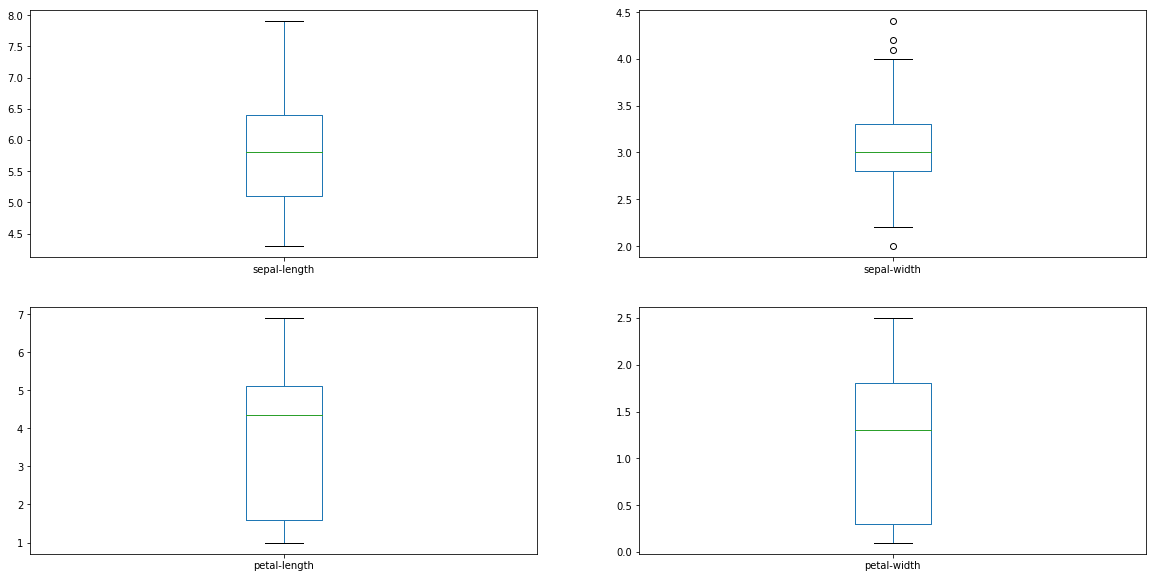

In [15]:
# 数据可视化：单变量图表了解每一个特征属性；多变量图表理解不同特征属性之间的关系
# 箱线图：展示数据的离散程度
dataset.plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False, figsize=(20, 10))
plt.show()

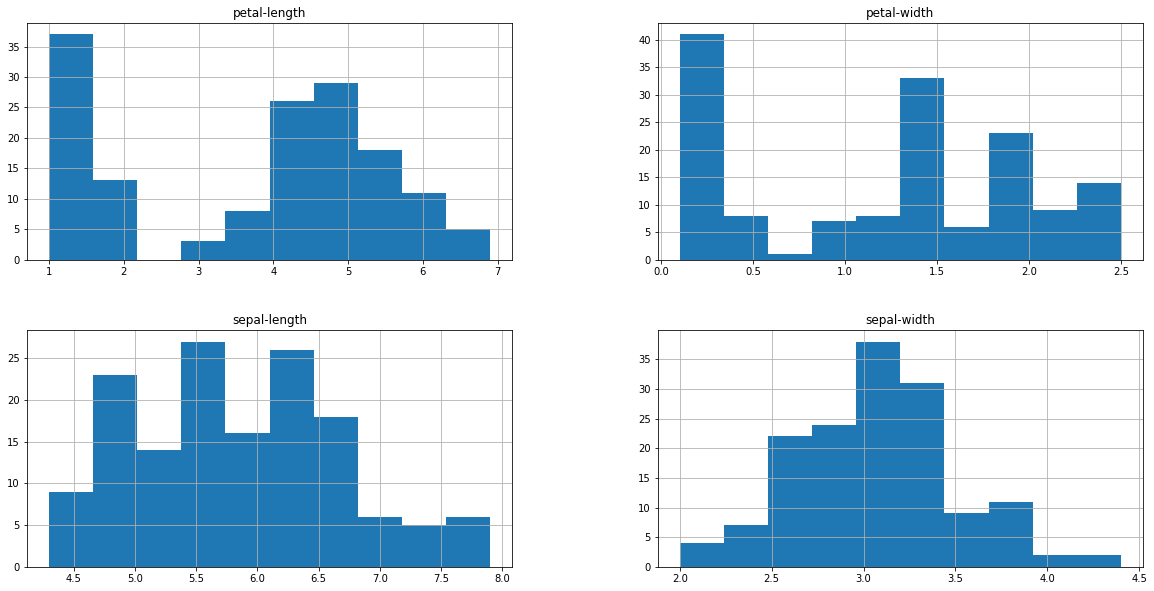

In [16]:
# 直方图
dataset.hist(figsize=(20, 10))
plt.show()

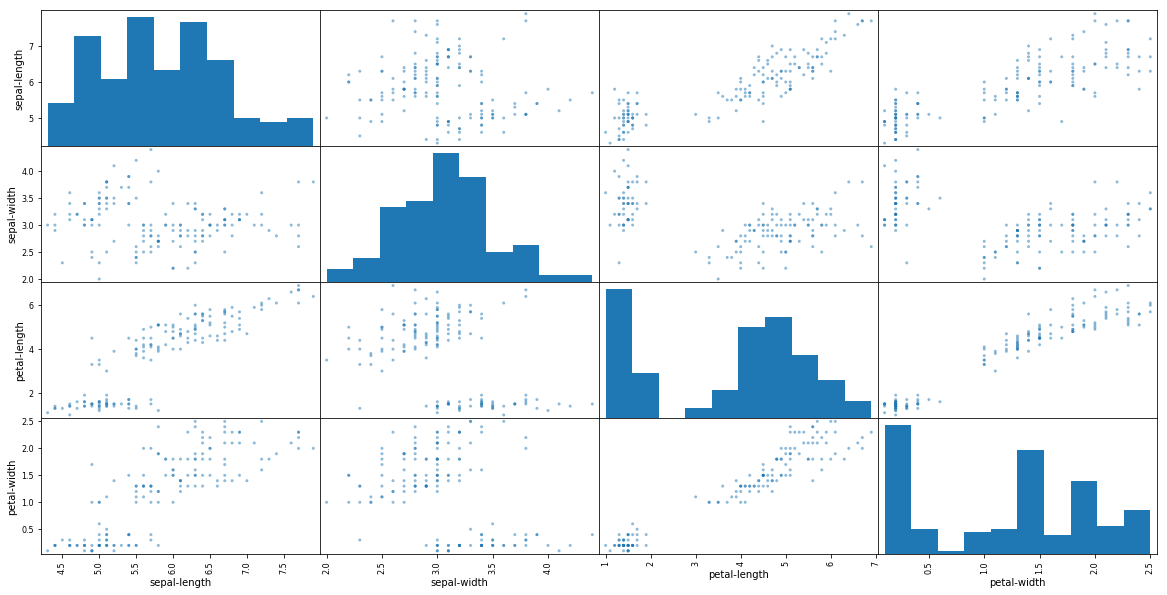

In [17]:
# 多变量图表：散点矩阵图
pd.plotting.scatter_matrix(dataset, figsize=(20, 10))
plt.show()

- 选择模型

    - 分离出评估数据集
    - 10 折交叉验证 (10-fold cross validation) 来评估算法模型
    - 生成 6 个不同的模型来预测新数据
    - 择优

In [18]:
# 分离数据集: X_train, Y_train用来训练算法创建模型
# Y_validation, Y_validation用来验证评估模型，评估模式：10折交叉验证，随机将数据分为10份，9份用来训练模型，1份用来评估算法
array = dataset.values
X = array[:, 0:4]
Y = array[:, 4]
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [19]:
# 算法比较
models = {}
models['LR'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()
models['NB'] = GaussianNB()
models['SVM'] = SVC()
results = []
for key in models:
    kFold = KFold(n_splits = 10, random_state=seed)
    cv_results = cross_val_score(models[key], X_train, Y_train, cv=kFold, scoring='accuracy')
    results.append(cv_results)
    print('%s: Mean = %f (std = %f)'%(key, cv_results.mean(), cv_results.std()))

LR: Mean = 0.966667 (std = 0.040825)
LDA: Mean = 0.975000 (std = 0.038188)
KNN: Mean = 0.983333 (std = 0.033333)
CART: Mean = 0.975000 (std = 0.038188)
NB: Mean = 0.975000 (std = 0.053359)
SVM: Mean = 0.991667 (std = 0.025000)


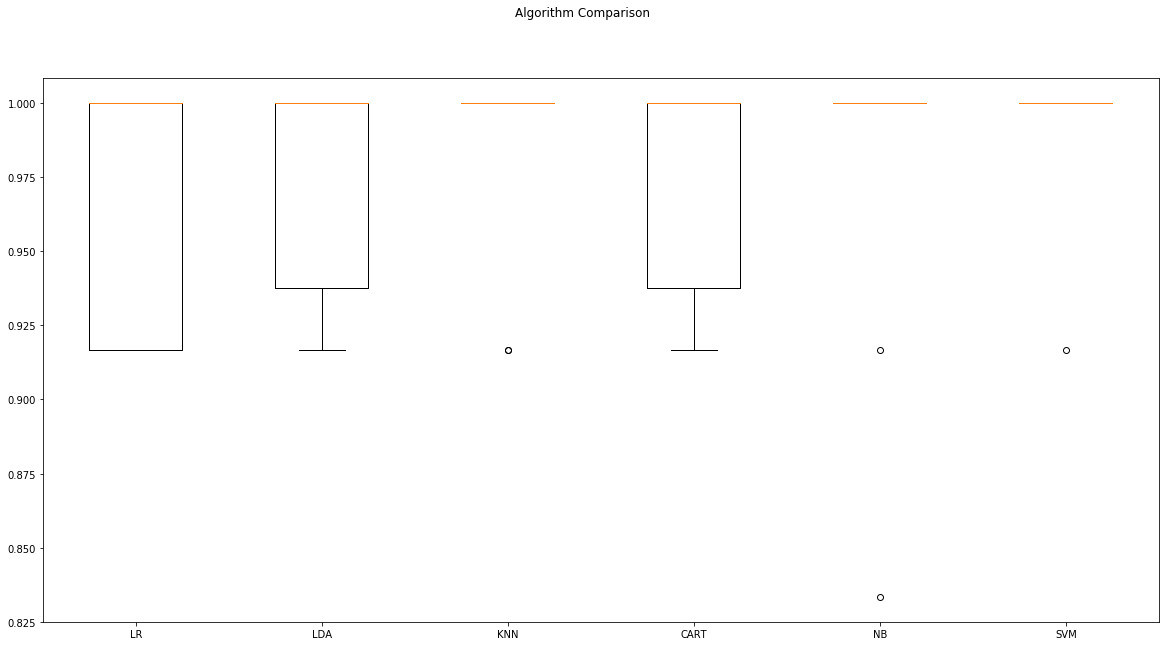

In [20]:
# 可视化算法质量
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()

In [21]:
# 实施预测，这时候预留的测试数据集派上用场
svm = SVC()
svm.fit(X = X_train, y = Y_train)
predictions = svm.predict(X_validation)
print(' 模型精确度', '\n', accuracy_score(Y_validation, predictions), '\n\n', 
      '混淆矩阵', '\n', confusion_matrix(Y_validation, predictions), '\n\n', 
      '数据报告', '\n', classification_report(Y_validation, predictions))

 模型精确度 
 0.9333333333333333 

 混淆矩阵 
 [[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]] 

 数据报告 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30



- 评估的指标：准确率 (accuracy), 精确率 (precision), 召回率 (recall), F1 值

    - 准确率：对于给定的测试数据集，分类器正确分类的样本数量与总样本数量之比
    
    - 精确率
$$P=\frac{TP}{TP+FP}$$

    - 召回率
$$R=\frac{TP}{TP+FN}$$

    - F1值
$$\frac{2}{F1}=\frac{1}{P}+\frac{1}{R}$$

- 决策树模型可视化

    - Mac 上，首先安装 Xcode, 再安装 MacPorts, 最后使用 MacPorts 安装 graphviz
        - `sudo port install graphviz-gui`

In [22]:
import pydotplus
from matplotlib.image import imread
from sklearn.tree import export_graphviz

In [23]:
# 训练决策树模型
model = DecisionTreeClassifier()
model.fit(X=X_train, y=Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
# 决策树图形化
dot_data = export_graphviz(model, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write('irisDecisionTree.png', format='png')

True

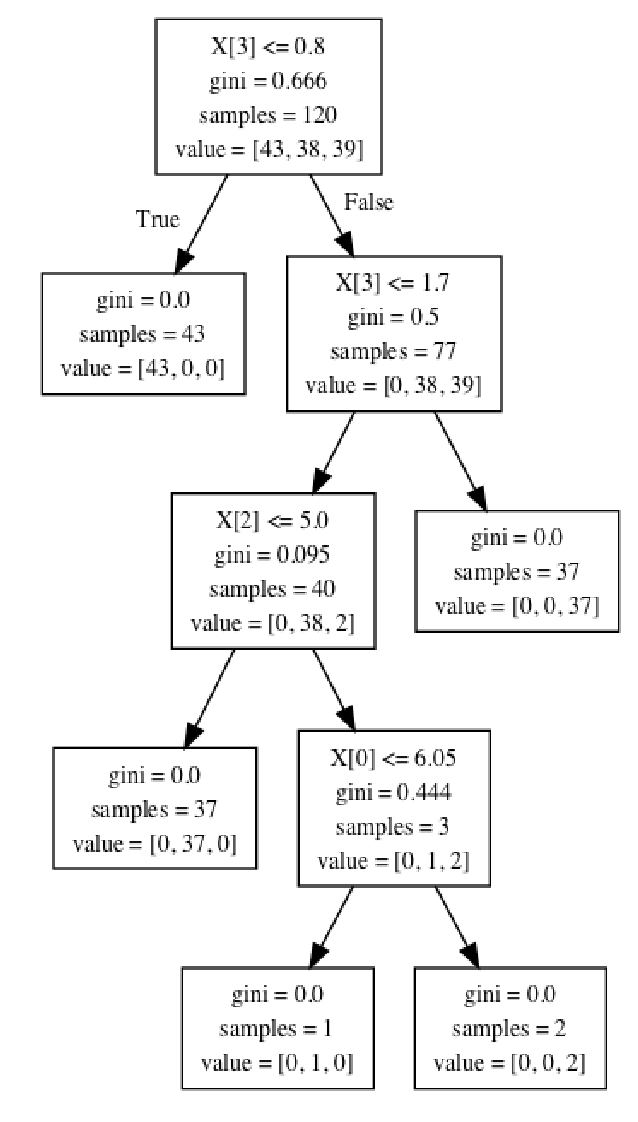

In [25]:
# 显示图像
plt.figure(figsize=(30, 20))
image_data = imread('irisDecisionTree.png')
plt.imshow(image_data)
plt.axis('off')
plt.show()